In [2]:
import drawSvg as draw

d = draw.Drawing(200, 100, origin='center', displayInline=False)

# Draw an irregular polygon
d.append(draw.Lines(-80, -45,
                    70, -49,
                    95, 49,
                    -90, 40,
                    close=False,
            fill='#eeee00',
            stroke='black'))

# Draw a rectangle
r = draw.Rectangle(-80,0,40,50, fill='#1248ff')
r.appendTitle("Our first rectangle")  # Add a tooltip
d.append(r)

# Draw a circle
d.append(draw.Circle(-40, -10, 30,
            fill='red', stroke_width=2, stroke='black'))

# Draw an arbitrary path (a triangle in this case)
p = draw.Path(stroke_width=2, stroke='lime',
              fill='black', fill_opacity=0.2)
p.M(-10, 20)  # Start path at point (-10, 20)
p.C(30, -10, 30, 50, 70, 20)  # Draw a curve to (70, 20)
d.append(p)

# Draw text
d.append(draw.Text('Basic text', 8, -10, 35, fill='blue'))  # Text with font size 8
d.append(draw.Text('Path text', 8, path=p, text_anchor='start', valign='middle'))
d.append(draw.Text(['Multi-line', 'text'], 8, path=p, text_anchor='end'))

# Draw multiple circular arcs
d.append(draw.ArcLine(60,-20,20,60,270,
            stroke='red', stroke_width=5, fill='red', fill_opacity=0.2))
d.append(draw.Arc(60,-20,20,60,270,cw=False,
            stroke='green', stroke_width=3, fill='none'))
d.append(draw.Arc(60,-20,20,270,60,cw=True,
            stroke='blue', stroke_width=1, fill='black', fill_opacity=0.3))

# Draw arrows
arrow = draw.Marker(-0.1, -0.5, 0.9, 0.5, scale=4, orient='auto')
arrow.append(draw.Lines(-0.1, -0.5, -0.1, 0.5, 0.9, 0, fill='red', close=True))
p = draw.Path(stroke='red', stroke_width=2, fill='none',
              marker_end=arrow)  # Add an arrow to the end of a path
p.M(20, -40).L(20, -27).L(0, -20)  # Chain multiple path operations
d.append(p)
d.append(draw.Line(30, -20, 0, -10,
            stroke='red', stroke_width=2, fill='none',
            marker_end=arrow))  # Add an arrow to the end of a line

d.setPixelScale(2)  # Set number of pixels per geometry unit
#d.setRenderSize(400,200)  # Alternative to setPixelScale
d.saveSvg('example.svg')
d.savePng('example.png')

# Display in Jupyter notebook
#d.rasterize()  # Display as PNG
d  # Display as SVG


starting 0
M : act index 0 if curve then use  0 1 2  of  12
finished at 1
starting 1
L : act index 1 if curve then use  1 2 3  of  12
1 L
finished at 2
starting 2
C : act index 2 if curve then use  2 3 4  of  12
starting new C at  2
2 C
finished at 4
starting 4
C : act index 4 if curve then use  4 5 6  of  12
starting new C at  4
4 C
finished at 6
starting 6
C : act index 6 if curve then use  6 7 8  of  12
starting new C at  6
6 C
finished at 8
starting 8
C : act index 8 if curve then use  8 9 10  of  12
starting new C at  8
else
finished at 11
starting 11
L : act index 11 if curve then use  11 12 13  of  12
11 L
finished at 12


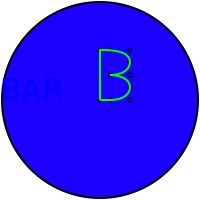

In [25]:
d = draw.Drawing(200, 200, origin='center', displayInline=True)
# Draw a circle
line_thk = 2
d.append(draw.Circle(0, 0, 100-line_thk, stroke_width=line_thk, fill='#1C00ff00', stroke='black'))

# Draw text
d.append(draw.Text('BAR', 30, -100, 0, fill='blue'))  # Text with font size 8

# Draw an arbitrary thickness B
p = draw.Path(stroke_width=2, stroke='lime',
              fill='black', fill_opacity=0.0)
pts = [
    ['M',0,0],                                                        #0
    ['L',0,50],                                                       #1
    ['C',10,50],                                                      #2
    ['C',30,50],                                                      #3
    ['C',30,50-50/4],                                                 #4
    ['C',30,50-50/2],                                                 #5
    ['C',10,50-50/2,'middle far left'],                               #6
    ['C',30,50-50/2],                                                 #7
    ['C',30,50-3*50/4,'bottom far right'],                            #8
    ['C',30,50-4*50/4],                                               #9
    ['C',10,50-4*50/4,'bottom bottom far left'],                      #10
    ['L',0,0]                                                         #11
]
i=0
while i <= len(pts)-1:
    print('starting',i)
    print(pts[i][0],':','act index',i, 'if curve then use ',i,i+1,i+2,' of ',len(pts))
    if pts[i][0] == 'M':
        p.M(pts[i][1],pts[i][2])
    elif pts[i][0] == 'L':
        print(i, 'L')
        p.L(pts[i][1],pts[i][2])
    elif pts[i][0] == 'C' :
        print('starting new C at ', i)
        p.C(pts[i][1],pts[i][2],pts[i+1][1],pts[i+1][2],pts[i+2][1],pts[i+2][2])
        if pts[i+3][0] == 'C':
            print(i,'C')
            i += 1
        else:
            print('else')
            i += 2
    i+= 1
    print('finished at',i)
    
'''
p.M(-0, 0)  # Start path at point (-10, 20)
p.L(0,50)
p.L(10,50)
p.C(32,50,30, 25, 10, 25)  # Draw a curve to (70, 20)
'''

line_thk = 1
for i in pts:
    d.append(draw.Circle(i[1], i[2], 2, stroke_width=line_thk, fill='#1C00ff00', stroke='black'))

d.append(p)

d

In [40]:
print(draw.Text('BAR', 30, 0, 0, fill='blue').height)

AttributeError: 'Text' object has no attribute 'height'

In [72]:
import re
#print(re.sub('[a-z]*@', 'ApD@', str))
f = '''['M',0,0],                                                #0
            ['L',0,amh],                                              #1
            ['C',10,amh],                                             #2
            ['C',amw,amh],                                            #3
            ['C',amw,amh/2],                                          #4
            ['C',amw,0],                                              #6
            ['C',10,amh],                                             #7
            ['L',0,0]                                                #8'''

split = f.split('\n')
for i,item in enumerate(split):
    if i < len(split)-1:
        justitem = re.sub(r'], .*',"],",item)
    else:
        justitem = re.sub(r'] .*',"],",item)
    leny = len(justitem)
    targetlen = 70
    if i == 0:
        targetlen -= 5
    newstr = " " * (targetlen-leny)+"#" + str(i)
    print(justitem + newstr)

['M',0,0],                                                       #0
            ['L',0,amh],                                              #1
            ['C',10,amh],                                             #2
            ['C',amw,amh],                                            #3
            ['C',amw,amh/2],                                          #4
            ['C',amw,0],                                              #5
            ['C',10,amh],                                             #6
            ['L',0,0],                                                #7


starting 0
M : act index 0 if curve then use  0 1 2  of  8
finished at 1
starting 1
L : act index 1 if curve then use  1 2 3  of  8
1 L
finished at 2
starting 2
C : act index 2 if curve then use  2 3 4  of  8
starting new C at  2
2 C
finished at 4
starting 4
C : act index 4 if curve then use  4 5 6  of  8
starting new C at  4
else
finished at 7
starting 7
L : act index 7 if curve then use  7 8 9  of  8
7 L
finished at 8


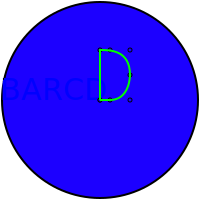

In [75]:
def draw_letter(letter):
    d = draw.Drawing(200, 200, origin='center', displayInline=True)
    # Draw a circle
    line_thk = 2
    d.append(draw.Circle(0, 0, 100-line_thk, stroke_width=line_thk, fill='#1C00ff00', stroke='black'))

    # Draw text
    d.append(draw.Text('BARCD', 30, -100, 0, fill='blue'))  # Text with font size 8

    # Draw an arbitrary thickness B
    p = draw.Path(stroke_width=2, stroke='lime',
                  fill='black', fill_opacity=0.0)
    amw = alphabet_max_width = 30
    amh = alphabet_max_height = 50
    stp = stay_point = 10
    alphabet = {
        "A": [
            ['M',0,0],                                                  #0
            ['L',amw/2,amh,'top'],                                      #1
            ['L',(amw - amw/2)*2/3+amw/2,amh/3,'before crossing'],      #2
            ['L',(amw - amw/2)*1/3 + 0,amh/3,'make the cross'],         #3
            ['L',(amw - amw/2)*2/3+amw/2,amh/3, 'after crossing'],      #4
            ['L',amw,0]                                                 #5
        ],
        "B": [
            ['M',0,0],                                                #0
            ['L',0,amh],                                              #1
            ['C',stp,amh],                                             #2
            ['C',amw,amh],                                            #3
            ['C',amw,amh-amh/4],                                      #4
            ['C',amw,amh-amh/2],                                      #5
            ['C',amw*.33,amh-amh/2,'middle far left'],                #6
            ['C',amw,amh-amh/2],                                      #7
            ['C',amw,amh-3*amh/4,'bottom far right'],                 #8
            ['C',amw,amh-4*amh/4],                                    #9
            ['C',stp,amh-4*amh/4,'bottom bottom far left'],            #10
            ['L',0,0]                                                 #11  
        ],
        "C":[
            ['M',amw*5/6,amh/5],                                                #0
            ['C',amw*5/6,amh],                                              #1
            ['C',amw/2,amh],                                             #2
            ['C',amw,amh],                                            #3
            ['C',amw,amh-amh/4],                                      #4
            ['C',amw,amh-amh/2],                                      #5
            ['C',amw*.33,amh-amh/2,'middle far left'],                #6
            ['L',amw,0]
        ],
        "D":[
            ['M',0,0],                                                       #0
            ['L',0,amh],                                              #1
            ['C',stp,amh],                                             #2
            ['C',amw,amh],                                            #3
            ['C',amw,amh/2],                                          #4
            ['C',amw,0],                                              #5
            ['C',stp,0],                                             #6
            ['L',0,0],                                                #7
        ],
        "R":[
            ['M',0,0],                                                #0
            ['L',0,amh],                                              #1
            ['C',stp,amh],                                             #2
            ['C',amw,amh],                                            #3
            ['C',amw,amh-amh/4],                                      #4
            ['C',amw,amh-amh/2],                                      #5
            ['C',amw*.33,amh-amh/2,'middle far left'],                #6
            ['L',amw,0]
        ]
    }
    
    pts = alphabet[letter]
    i=0
    while i <= len(pts)-1:
        print('starting',i)
        print(pts[i][0],':','act index',i, 'if curve then use ',i,i+1,i+2,' of ',len(pts))
        if pts[i][0] == 'M':
            p.M(pts[i][1],pts[i][2])
        elif pts[i][0] == 'L':
            print(i, 'L')
            p.L(pts[i][1],pts[i][2])
        elif pts[i][0] == 'C' :
            print('starting new C at ', i)
            p.C(pts[i][1],pts[i][2],pts[i+1][1],pts[i+1][2],pts[i+2][1],pts[i+2][2])
            if pts[i+3][0] == 'C':
                print(i,'C')
                i += 1
            else:
                print('else')
                i += 2
        i+= 1
        print('finished at',i)

    '''
    p.M(-0, 0)  # Start path at point (-10, 20)
    p.L(0,50)
    p.L(10,50)
    p.C(32,50,30, 25, 10, 25)  # Draw a curve to (70, 20)
    '''

    line_thk = 1
    for i in pts:
        d.append(draw.Circle(i[1], i[2], 2, stroke_width=line_thk, fill='#1C00ff00', stroke='black'))

    d.append(p)

    return d

draw_letter("D")